In [122]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

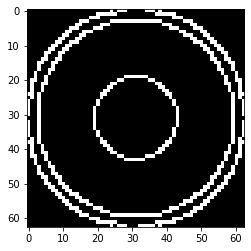

In [123]:
img = cv2.imread("test2.jpg")

template = cv2.imread("template.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = imutils.resize(template, width = int(template.shape[1] * 1.5))
template = cv2.Canny(template,50,200)
plt.imshow(template,cmap='gray')


In [124]:

(tH,tW) = template.shape[:2]
clone = img.copy()



In [125]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.Canny(gray,50,200)
resized_images = []
found = None
for scale in np.linspace(0.5, 2, 20)[::-1]:
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])
    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
    resized_images.append(resized)

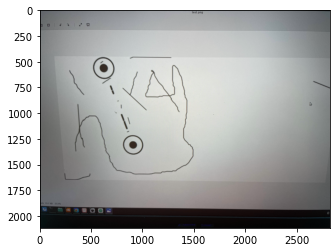

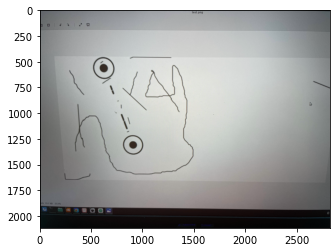

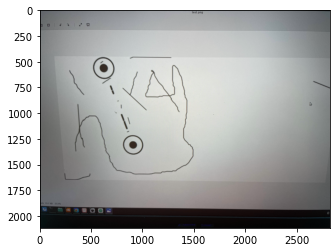

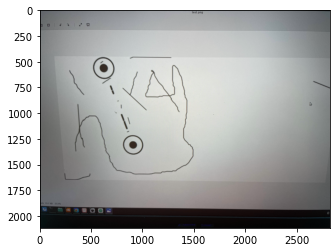

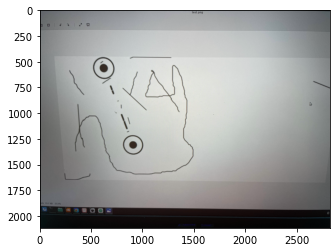

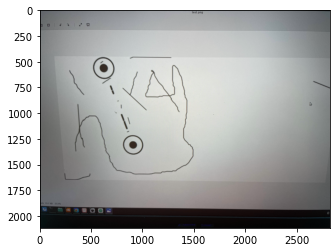

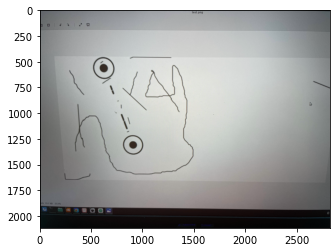

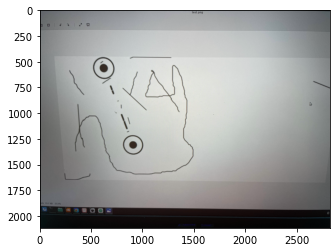

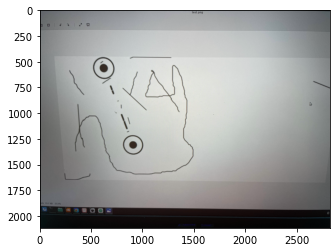

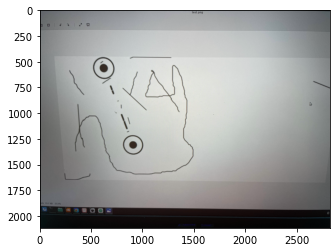

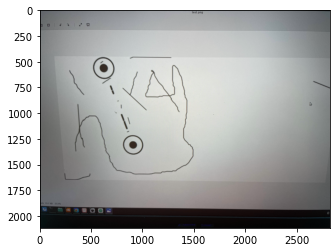

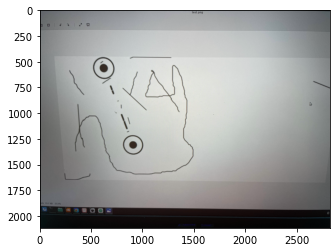

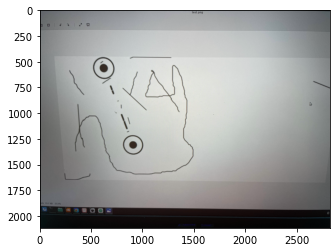

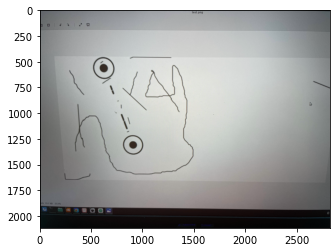

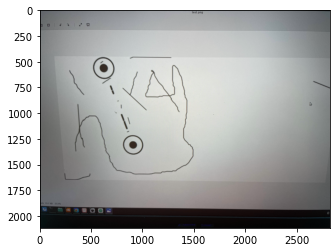

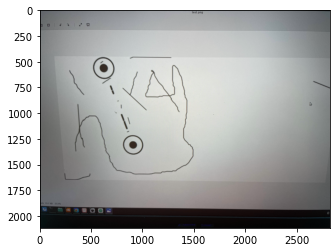

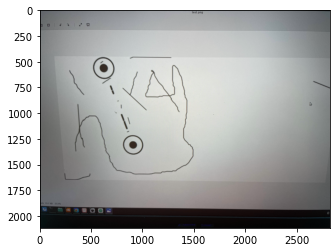

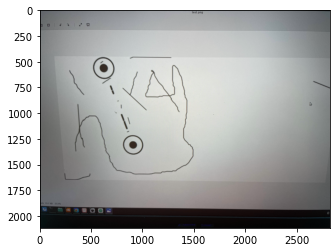

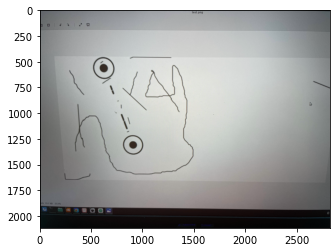

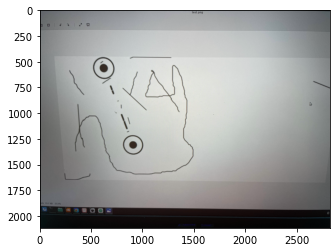

In [126]:

for i in range(len(resized_images)):
    res = cv2.matchTemplate(resized_images[i],template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(clone, pt, (pt[0] + tW, pt[1] + tH), (0,0,255), 2)
    plt.figure()
    plt.imshow(clone)